#Project Overview
Computer vision can be used to automate supervision and trigger appropriate actions if an event is predicted from an image of interest.
For example, food items can be easily identified by a camera based on:

- The type of food

- Color

- Ingredients, etc.

## 📊 Data Description
The Food101 dataset contains 16,256 images across 17 food classes.

Each class can be roughly split into 70% training and 30% testing.

Classes are typically food names (e.g., apple_pie, chicken_curry).

The dataset has already been attached with this project. Please use the same version provided.

## 📎 Original Dataset Link for Reference Only:
Food101 Dataset on Kaggle

## 📖 Reference
The dataset was originally introduced in the paper:
"Food-101 – Mining Discriminative Components with Random Forests"
Authors: Lukas Bossard, Matthieu Guillaumin, Luc Van Gool



In [3]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
                                                                                                # Importing the sequential module to define a sequential model


In [4]:
# Uncomment and run the following code in case Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!unzip '/content/drive/MyDrive/Python Course_shared/computer Vision/Food_101.zip'


Streaming output truncated to the last 5000 lines.
  inflating: Food_101/nachos/2305287.jpg  
  inflating: __MACOSX/Food_101/nachos/._2305287.jpg  
  inflating: Food_101/nachos/2644747.jpg  
  inflating: __MACOSX/Food_101/nachos/._2644747.jpg  
  inflating: Food_101/nachos/1425651.jpg  
  inflating: __MACOSX/Food_101/nachos/._1425651.jpg  
  inflating: Food_101/nachos/835919.jpg  
  inflating: __MACOSX/Food_101/nachos/._835919.jpg  
  inflating: Food_101/nachos/908454.jpg  
  inflating: __MACOSX/Food_101/nachos/._908454.jpg  
  inflating: Food_101/nachos/2553526.jpg  
  inflating: __MACOSX/Food_101/nachos/._2553526.jpg  
  inflating: Food_101/nachos/1323906.jpg  
  inflating: __MACOSX/Food_101/nachos/._1323906.jpg  
  inflating: Food_101/nachos/3228958.jpg  
  inflating: __MACOSX/Food_101/nachos/._3228958.jpg  
  inflating: Food_101/nachos/346658.jpg  
  inflating: __MACOSX/Food_101/nachos/._346658.jpg  
  inflating: Food_101/nachos/2702921.jpg  
  inflating: __MACOSX/Food_101/nachos/.

In [16]:
# Image folder
food_101_image_folder = '/content/Food_101/'

In [52]:
# Metadat Class for storing it
class IdentityMetadata():
    def __init__(self, base, name, file, size):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file
        self.size=size

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)


#### Helper Functions

In [53]:
def load_metadata(path):
    if not os.path.exists(path):
        raise ValueError(f"Path does not exist: {path}")

    metadata = []
    for index, folder in enumerate(os.listdir(path)):
        subdir_path = os.path.join(path, folder)
        if not os.path.isdir(subdir_path):
            continue  # Skip files like .DS_Store or any non-folder

        # Get all valid image files in the subdirectory
        image_files = [f for f in os.listdir(subdir_path)
                       if f.lower().endswith(('.jpg', '.jpeg'))]

        total_images = len(image_files)

        for file in image_files:
            metadata.append(IdentityMetadata(path, folder, file, total_images))

    return np.array(metadata)


In [14]:
# Read & Load Image
def load_image(path):
  """
  Load image from path
  """
  img = cv2.imread(path)
  # Convert to RGB
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [54]:
# load image metadata from folder
metadata = load_metadata(food_101_image_folder)

In [55]:
# Show shape of metadata
metadata.shape

(16256,)

In [111]:
# Select 2 images per class (name)
seen = {}
filtered = []

for item in metadata:
    if seen.get(item.name,0) < 2:
        filtered.append(item)
        value=seen.get(item.name,0)
        seen[item.name]=value+1

print(f"Total no of classes {len(seen.keys())}")
print(f"Classes Present {list(seen.keys())}")



Total no of classes 17
Classes Present ['pizza', 'tacos', 'ice_cream', 'nachos', 'french_fries', 'spring_rolls', 'chocolate_cake', 'apple_pie', 'ravioli', 'strawberry_shortcake', 'donuts', 'falafel', 'hot_dog', 'onion_rings', 'waffles', 'pancakes', 'samosa']


In [120]:
class_map={}
for i in range(0,len(metadata)):
    if seen.get(metadata[i].name,0) !=0:
        class_map[metadata[i].name]= metadata[i].size
df=pd.DataFrame(class_map,index=[0]).T
df.columns = ['class_size']
df.index.name = 'class_name'

In [121]:
df

class_size
class_name                      
pizza                       1000
tacos                       1000
ice_cream                   1000
nachos                      1000
french_fries                1000
spring_rolls                1000
chocolate_cake              1000
apple_pie                    256
ravioli                     1000
strawberry_shortcake        1000
donuts                      1000
falafel                     1000
hot_dog                     1000
onion_rings                 1000
waffles                     1000
pancakes                    1000
samosa                      1000

### Show 2 Images from Each class

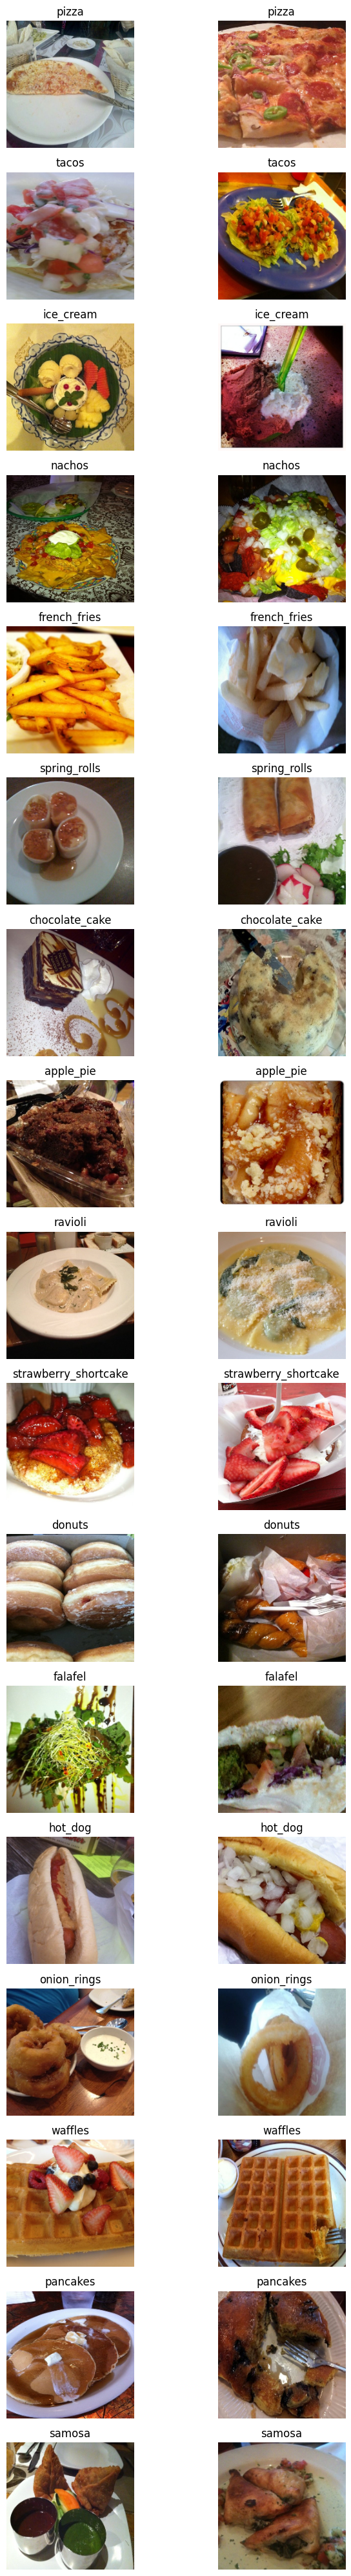

In [106]:
# Limit to 34 images for 17x2 grid
filtered = filtered[:34]

# Set up 17 rows × 2 columns
fig, axes = plt.subplots(17, 2, figsize=(8, 40))
axes = axes.flatten()

for i in range(len(filtered)):
    img = cv2.imread(filtered[i].image_path())
    if img is None:
        continue
    img_resized = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    axes[i].imshow(img_rgb)
    axes[i].set_title(filtered[i].name)
    axes[i].axis('off')

# Turn off any remaining axes
for j in range(len(filtered), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [82]:
len(filtered)

17

/content/Food_101/pizza/920219.jpg
/content/Food_101/pizza/3550805.jpg
/content/Food_101/pizza/1123386.jpg
/content/Food_101/pizza/666569.jpg
/content/Food_101/pizza/3367113.jpg
/content/Food_101/pizza/382829.jpg
/content/Food_101/pizza/2667824.jpg
/content/Food_101/pizza/3669673.jpg
/content/Food_101/pizza/2508636.jpg
/content/Food_101/pizza/1260554.jpg
/content/Food_101/pizza/1806491.jpg
/content/Food_101/pizza/2965.jpg
/content/Food_101/pizza/2671508.jpg
/content/Food_101/pizza/2693334.jpg
/content/Food_101/pizza/1029698.jpg
/content/Food_101/pizza/3105724.jpg
/content/Food_101/pizza/3650727.jpg
/content/Food_101/pizza/790432.jpg
/content/Food_101/pizza/3724187.jpg
/content/Food_101/pizza/420409.jpg


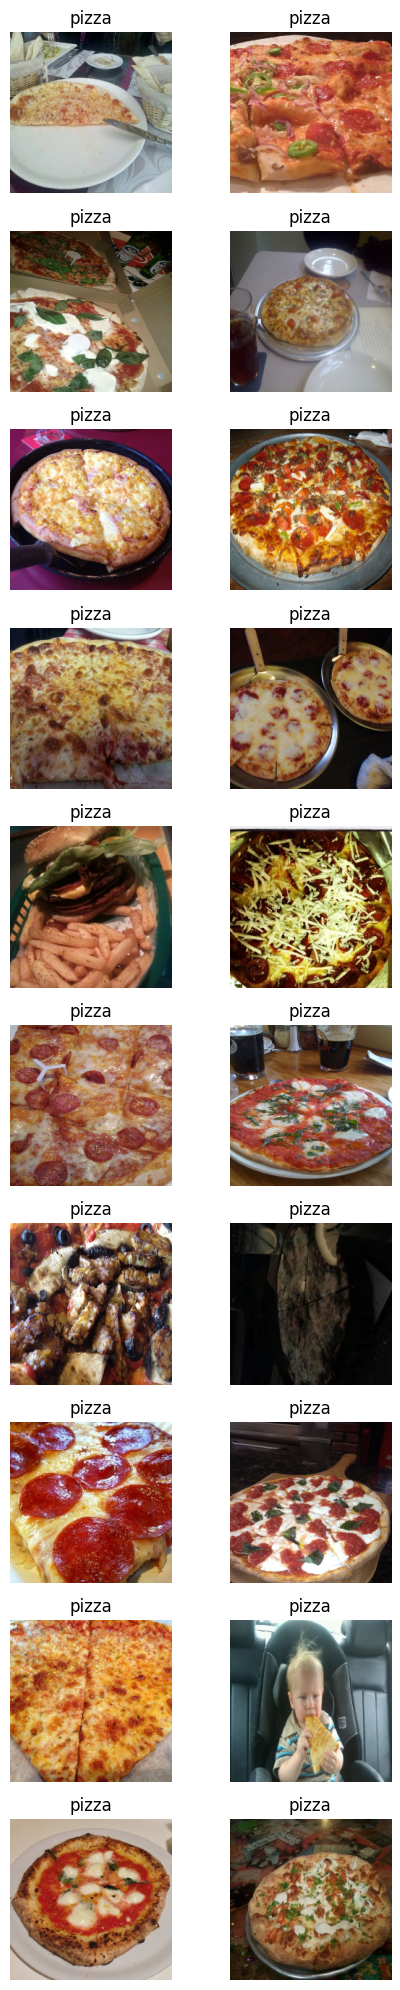